<a href="https://colab.research.google.com/github/AfifNurraihan/Kumpulan-Proyek-Python/blob/main/Proyek_Kedua_Membuat_Model_Machine_Learning_dengan_Data_Time_Series_(Afif_Nurraihan).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import library
import numpy as np
import pandas as pd
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
# Read datasets
df = pd.read_csv('NFLX.csv')
df = df.drop(columns=['Open','High','Low','Adj Close','Volume'])
df

,Date,Close
0,2018-02-05,254.259995
1,2018-02-06,265.720001
2,2018-02-07,264.559998
3,2018-02-08,250.100006
4,2018-02-09,249.470001
...,...,...
1004,2022-01-31,427.140015
1005,2022-02-01,457.130005
1006,2022-02-02,429.480011
1007,2022-02-03,405.600006


In [ ]:
# Normalization
df["Close"] = (df["Close"] - df["Close"].mean()) / df["Close"].std()

In [ ]:
df

,Date,Close
0,2018-02-05,-1.521292
1,2018-02-06,-1.415465
2,2018-02-07,-1.426177
3,2018-02-08,-1.559708
4,2018-02-09,-1.565525
...,...,...
1004,2022-01-31,0.075162
1005,2022-02-01,0.352103
1006,2022-02-02,0.096771
1007,2022-02-03,-0.123749


In [ ]:
#Checking for null values
df.isnull().sum()

Date     0
Close    0
dtype: int64

In [ ]:
# Threshold
threshold_mae = (df['Close'].max() - df['Close'].min()) * 10/100
threshold_mae

0.422762953364581

In [ ]:
# Divide the data into training data and testing data
from sklearn.model_selection import train_test_split
date = df['Date'].values
close = df['Close'].values
date_train, date_test, close_train, close_test = train_test_split(date, close, test_size=0.2, shuffle=False)

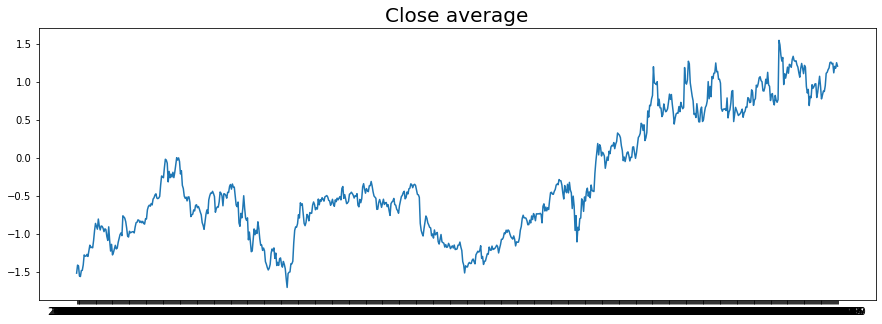

In [ ]:
# Plot Close Average
plt.figure(figsize=(15,5))
plt.plot(date_train, close_train)
plt.title('Close average',
          fontsize=20);

In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [ ]:
train_set = windowed_dataset(close_train, window_size=80, batch_size=100, shuffle_buffer=1000)
model = tf.keras.models.Sequential([
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
  tf.keras.layers.LSTM(64),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(64, activation="relu"),
  tf.keras.layers.Dense(1),
])

In [ ]:
optimizer = tf.keras.optimizers.Adam()
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set,epochs=50)

Epoch 1/50
8/8 [==============================] - 11s 72ms/step - loss: 0.2161 - mae: 0.5646
Epoch 2/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0653 - mae: 0.2799
Epoch 3/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0541 - mae: 0.2489
Epoch 4/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0427 - mae: 0.2256
Epoch 5/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0340 - mae: 0.2002
Epoch 6/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0339 - mae: 0.1997
Epoch 7/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0294 - mae: 0.1855
Epoch 8/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0301 - mae: 0.1853
Epoch 9/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0269 - mae: 0.1738
Epoch 10/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0271 - mae: 0.1760
Epoch 11/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0217